<a href="https://colab.research.google.com/github/Akami14/DS_Neural_Networks/blob/l3_tf_keras/l3_tf_keras__ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Попробуйте улучшить работу нейронной сети (разобранную на уроке), обучавшейся на датасет Fashion-MNIST. Напишите в комментариях к уроку, какого результата вы добились от нейросети и что помогло улучшить её точность.
2. Попробуйте найти полезные команды TensorFlow, неразобранные на уроке

In [1]:
!pip install -q -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 2.9 MB/s eta 0:00:00


План по улучшению:
 - Составить несколько моделей с разными параметрами;
 - Поискать оптимальные варианты;
 - Применить несколько разных оптимайзеров;
 - Применить callback;
 - Сделать сборку предсказаний из нескольких моделей (Идея обучить одну из моделей на обратном векторе);

In [13]:
# from __future__ import absolute_import,division, print_function, unicode_literals

#TensorFlow and tf.keras
import tensorflow as tf
tf.random.set_seed(5)
from tensorflow import keras
from tensorflow.keras import callbacks
from tensorflow.keras.utils import to_categorical, to_ordinal
from tensorflow.keras.models import load_model
#Helper libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras_tuner as kt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, accuracy_score

print(tf.__version__)

2.14.0


In [14]:
def recall_precision(y_true, y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]):
  precision = precision_score(y_true, y_pred, labels=labels, average=None)
  recall = recall_score(y_true, y_pred, labels=labels, average=None)
  for i, el in enumerate(zip(precision, recall)):
    print(f'Класс - {i}, точность - {el[0]:.3f}, полнота - {el[1]:.3f}')

## Импортируем Fashion MNIST датасет

In [15]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize.
train_images = (train_images / 255)
test_images = (test_images / 255)


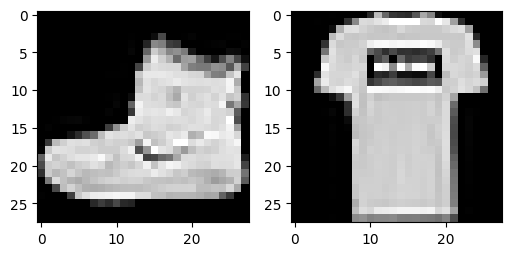

In [4]:
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.imshow(train_images[0], cmap='gray')
plt.subplot(1,2,2)
plt.imshow(train_images[1], cmap='gray')

Датасет содержит следующие классы:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Каждому классу обозначенному цифрой мы можем присвоить текстовое значение -

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Определение слоев

4 слоя нейронной сети с помощью функционала Keras.layers

In [16]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28), name='input'),
    keras.layers.Dense(256, activation='relu', name='hiden_one'),
    keras.layers.Dense(128, activation='relu', name='hiden_two'),
    keras.layers.Dense(64, activation='tanh', name='hiden_three'),
    keras.layers.Dense(64, activation='relu', name='hiden_four'),
    keras.layers.Dense(10, name='output')
])
config = model.get_config()
model.save_weights('fashion_weights.h5')

313/313 - 1s - loss: 0.3523 - accuracy: 0.8890 - 900ms/epoch - 3ms/step

Test accuracy: 0.8889999985694885
313/313 [==============================] - 1s 3ms/step


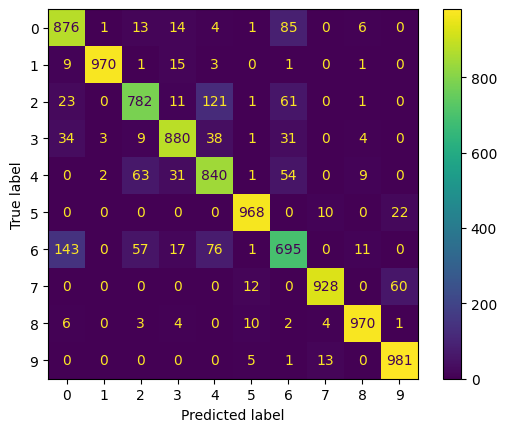

In [17]:
model = model.from_config(config)
model.load_weights('fashion_weights.h5')


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.fit(train_images, train_labels, batch_size = 250, epochs=25, verbose=0)
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)
  # Получим предсказания
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
y_pred = np.argmax(predictions, axis=1)
# Посмотрим на результаты
ConfusionMatrixDisplay.from_predictions(test_labels, y_pred)

In [18]:
recall_precision(test_labels, y_pred)

Класс - 0, точность - 0.803, полнота - 0.876
Класс - 1, точность - 0.994, полнота - 0.970
Класс - 2, точность - 0.843, полнота - 0.782
Класс - 3, точность - 0.905, полнота - 0.880
Класс - 4, точность - 0.776, полнота - 0.840
Класс - 5, точность - 0.968, полнота - 0.968
Класс - 6, точность - 0.747, полнота - 0.695
Класс - 7, точность - 0.972, полнота - 0.928
Класс - 8, точность - 0.968, полнота - 0.970
Класс - 9, точность - 0.922, полнота - 0.981


## 5 слоев + selu вместо relu

In [39]:
model_2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28), name='input'),
    keras.layers.Dense(512, activation='selu', name='hiden_one'),
    keras.layers.Dense(256, activation='selu', name='hiden_two'),
    keras.layers.Dense(128, activation='selu', name='hiden_thre'),
    keras.layers.Dense(64, activation='tanh', name='hiden_four'),
    keras.layers.Dense(32, activation='selu', name='hiden_five'),
    keras.layers.Dense(10, name='output')
])
config = model_2.get_config()
model_2.save_weights('fashion_weights_2.h5')

313/313 - 1s - loss: 0.3449 - accuracy: 0.8845 - 1s/epoch - 3ms/step

Test accuracy: 0.8845000267028809
313/313 [==============================] - 1s 4ms/step


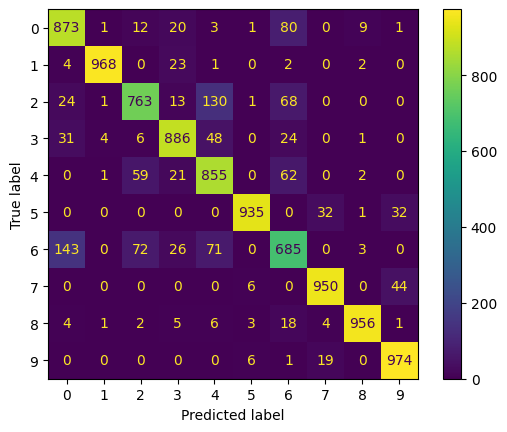

In [40]:
model_2 = model_2.from_config(config)
model_2.load_weights('fashion_weights_2.h5')


model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model_2.fit(train_images, train_labels, batch_size = 250, epochs=25, verbose=0)
  # model.fit(train_images, train_labels, batch_size = 250, epochs=el, verbose=0, validation_data=(test_images, test_labels))
  # model.fit(train_images, train_labels, batch_size = 10, epochs=10, verbose=0, validation_data=(test_images, test_labels), callbacks=[reduce_lr])
test_loss, test_acc = model_2.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)
  # Получим предсказания
probability_model = tf.keras.Sequential([model_2,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
y_pred = np.argmax(predictions, axis=1)
# Посмотрим на результаты
ConfusionMatrixDisplay.from_predictions(test_labels, y_pred)

In [41]:
recall_precision(test_labels, y_pred)

Класс - 0, точность - 0.809, полнота - 0.873
Класс - 1, точность - 0.992, полнота - 0.968
Класс - 2, точность - 0.835, полнота - 0.763
Класс - 3, точность - 0.891, полнота - 0.886
Класс - 4, точность - 0.768, полнота - 0.855
Класс - 5, точность - 0.982, полнота - 0.935
Класс - 6, точность - 0.729, полнота - 0.685
Класс - 7, точность - 0.945, полнота - 0.950
Класс - 8, точность - 0.982, полнота - 0.956
Класс - 9, точность - 0.926, полнота - 0.974


## Увеличим количество нейронов на 1 скрытом слое активация selu

In [42]:
model_3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28), name='input'),
    keras.layers.Dense(512, activation='selu', name='hiden_one'),
    keras.layers.Dense(200, activation='selu', name='hiden_two'),
    keras.layers.Dense(100, activation='tanh', name='hiden_three'),
    keras.layers.Dense(50, activation='selu', name='hiden_four'),
    keras.layers.Dense(10, name='output')
])
config = model_3.get_config()
model_3.save_weights('fashion_weights_3.h5')



313/313 - 1s - loss: 0.7696 - accuracy: 0.7094 - 1s/epoch - 4ms/step

Test accuracy: 0.7093999981880188
313/313 [==============================] - 1s 3ms/step


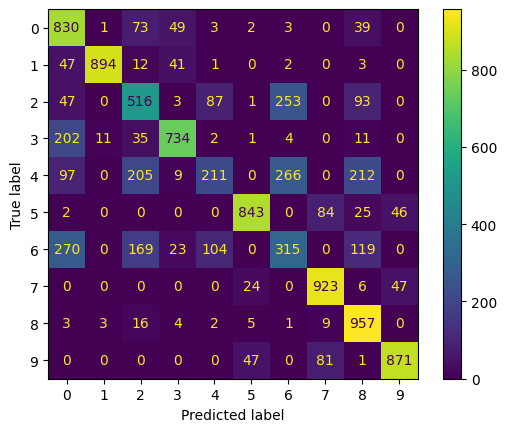

In [43]:
model_3 = model_3.from_config(config)
model_3.load_weights('fashion_weights_3.h5')


model_3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model_3.fit(train_images, train_labels, batch_size = 10, epochs=20, verbose=0)
test_loss, test_acc = model_3.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)
  # Получим предсказания
probability_model = tf.keras.Sequential([model_3,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
y_pred = np.argmax(predictions, axis=1)
# Посмотрим на результаты
ConfusionMatrixDisplay.from_predictions(test_labels, y_pred)

In [44]:
recall_precision(test_labels, y_pred)

Класс - 0, точность - 0.554, полнота - 0.830
Класс - 1, точность - 0.983, полнота - 0.894
Класс - 2, точность - 0.503, полнота - 0.516
Класс - 3, точность - 0.851, полнота - 0.734
Класс - 4, точность - 0.515, полнота - 0.211
Класс - 5, точность - 0.913, полнота - 0.843
Класс - 6, точность - 0.373, полнота - 0.315
Класс - 7, точность - 0.841, полнота - 0.923
Класс - 8, точность - 0.653, полнота - 0.957
Класс - 9, точность - 0.904, полнота - 0.871


## Заменим ф-ю активации в первом и последнем скрытом слое на sigmoid

In [27]:
model_4 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28), name='input'),
    keras.layers.Dense(256, activation='sigmoid', name='hiden_one'),
    keras.layers.Dense(128, activation='relu', name='hiden_two'),
    keras.layers.Dense(64, activation='tanh', name='hiden_three'),
    keras.layers.Dense(64, activation='sigmoid', name='hiden_four'),
    keras.layers.Dense(10, name='output')
])
config = model_4.get_config()
model_4.save_weights('fashion_weights_4.h5')

313/313 - 1s - loss: 0.3660 - accuracy: 0.8701 - 716ms/epoch - 2ms/step

Test accuracy: 0.8701000213623047
313/313 [==============================] - 1s 2ms/step


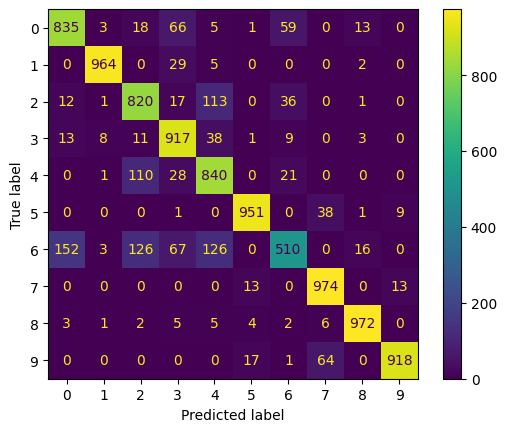

In [28]:
model_4 = model_4.from_config(config)
model_4.load_weights('fashion_weights_4.h5')


model_4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model_4.fit(train_images, train_labels, batch_size = 250, epochs=10, verbose=0)
test_loss, test_acc = model_4.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)
  # Получим предсказания
probability_model = tf.keras.Sequential([model_4,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
y_pred = np.argmax(predictions, axis=1)
# Посмотрим на результаты
ConfusionMatrixDisplay.from_predictions(test_labels, y_pred)

In [29]:
recall_precision(test_labels, y_pred)

Класс - 0, точность - 0.823, полнота - 0.835
Класс - 1, точность - 0.983, полнота - 0.964
Класс - 2, точность - 0.754, полнота - 0.820
Класс - 3, точность - 0.812, полнота - 0.917
Класс - 4, точность - 0.742, полнота - 0.840
Класс - 5, точность - 0.964, полнота - 0.951
Класс - 6, точность - 0.799, полнота - 0.510
Класс - 7, точность - 0.900, полнота - 0.974
Класс - 8, точность - 0.964, полнота - 0.972
Класс - 9, точность - 0.977, полнота - 0.918


## 4 Слой уменьшили количество нейронов

In [48]:
model_5 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28), name='input'),
    keras.layers.Dense(256, activation='relu', name='hiden_one'),
    keras.layers.Dense(128, activation='relu', name='hiden_two'),
    keras.layers.Dense(64, activation='tanh', name='hiden_three'),
    keras.layers.Dense(32, activation='relu', name='hiden_four'),
    keras.layers.Dense(10, name='output')
])
config = model_5.get_config()
model_5.save_weights('fashion_weights_5.h5')

313/313 - 1s - loss: 0.3453 - accuracy: 0.8789 - 768ms/epoch - 2ms/step

Test accuracy: 0.8788999915122986
313/313 [==============================] - 1s 2ms/step


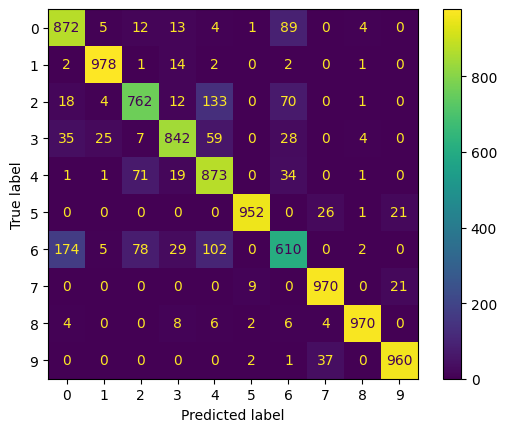

In [49]:
model_5 = model_5.from_config(config)
model_5.load_weights('fashion_weights_5.h5')


model_5.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model_5.fit(train_images, train_labels, batch_size = 10, epochs=10, verbose=0)
  # model.fit(train_images, train_labels, batch_size = 250, epochs=el, verbose=0, validation_data=(test_images, test_labels))
  # model.fit(train_images, train_labels, batch_size = 10, epochs=10, verbose=0, validation_data=(test_images, test_labels), callbacks=[reduce_lr])
test_loss, test_acc = model_5.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)
  # Получим предсказания
probability_model = tf.keras.Sequential([model_5,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
y_pred = np.argmax(predictions, axis=1)
# Посмотрим на результаты
ConfusionMatrixDisplay.from_predictions(test_labels, y_pred)

In [50]:
recall_precision(test_labels, y_pred)

Класс - 0, точность - 0.788, полнота - 0.872
Класс - 1, точность - 0.961, полнота - 0.978
Класс - 2, точность - 0.818, полнота - 0.762
Класс - 3, точность - 0.899, полнота - 0.842
Класс - 4, точность - 0.740, полнота - 0.873
Класс - 5, точность - 0.986, полнота - 0.952
Класс - 6, точность - 0.726, полнота - 0.610
Класс - 7, точность - 0.935, полнота - 0.970
Класс - 8, точность - 0.986, полнота - 0.970
Класс - 9, точность - 0.958, полнота - 0.960


## Сверточная нейроная сеть

In [11]:
model_6 = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2), strides=2),
    keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D((2, 2), strides=2),
    keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D((2, 2), strides=2),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])
config = model_6.get_config()
model_6.save_weights('fashion_weights_6.h5')

313/313 - 1s - loss: 0.3284 - accuracy: 0.9117 - 975ms/epoch - 3ms/step

Test accuracy: 0.9117000102996826
313/313 [==============================] - 1s 2ms/step


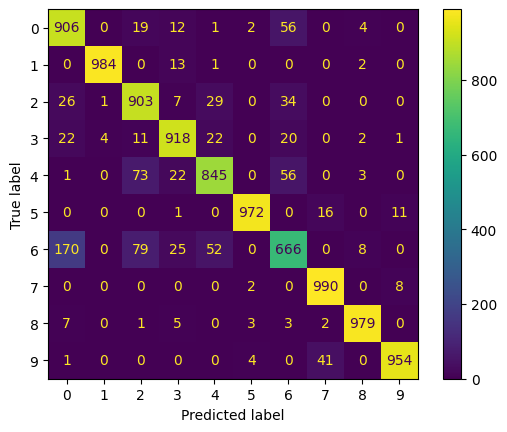

In [12]:
model_6 = model_6.from_config(config)
model_6.load_weights('fashion_weights_6.h5')


model_6.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model_6.fit(train_images, train_labels, batch_size = 10, epochs=10, verbose=0)
  # model.6fit(train_images, train_labels, batch_size = 250, epochs=el, verbose=0, validation_data=(test_images, test_labels))
  # model.fit(train_images, train_labels, batch_size = 10, epochs=10, verbose=0, validation_data=(test_images, test_labels), callbacks=[reduce_lr])
test_loss, test_acc = model_6.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)
  # Получим предсказания
probability_model = tf.keras.Sequential([model_6,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
y_pred = np.argmax(predictions, axis=1)
# Посмотрим на результаты
ConfusionMatrixDisplay.from_predictions(test_labels, y_pred)

In [13]:
recall_precision(test_labels, y_pred)

Класс - 0, точность - 0.800, полнота - 0.906
Класс - 1, точность - 0.995, полнота - 0.984
Класс - 2, точность - 0.831, полнота - 0.903
Класс - 3, точность - 0.915, полнота - 0.918
Класс - 4, точность - 0.889, полнота - 0.845
Класс - 5, точность - 0.989, полнота - 0.972
Класс - 6, точность - 0.798, полнота - 0.666
Класс - 7, точность - 0.944, полнота - 0.990
Класс - 8, точность - 0.981, полнота - 0.979
Класс - 9, точность - 0.979, полнота - 0.954


In [14]:
model_6 = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2), strides=2),
    keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D((2, 2), strides=2),
    keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D((2, 2), strides=2),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10)
])
config = model_6.get_config()
model_6.save_weights('fashion_weights_6.h5')

313/313 - 1s - loss: 0.3208 - accuracy: 0.9195 - 1s/epoch - 4ms/step

Test accuracy: 0.9194999933242798
313/313 [==============================] - 1s 2ms/step


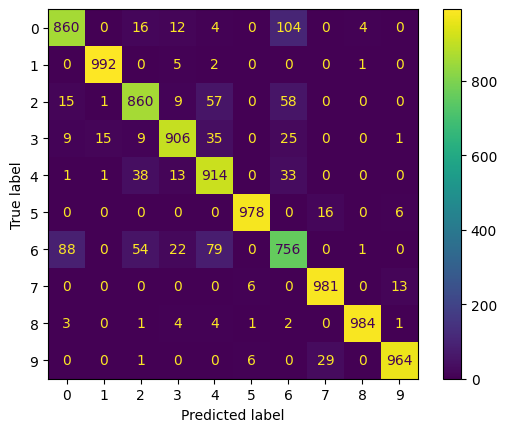

In [15]:
model_6 = model_6.from_config(config)
model_6.load_weights('fashion_weights_6.h5')


model_6.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model_6.fit(train_images, train_labels, batch_size = 10, epochs=10, verbose=0)
  # model.6fit(train_images, train_labels, batch_size = 250, epochs=el, verbose=0, validation_data=(test_images, test_labels))
  # model.fit(train_images, train_labels, batch_size = 10, epochs=10, verbose=0, validation_data=(test_images, test_labels), callbacks=[reduce_lr])
test_loss, test_acc = model_6.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)
  # Получим предсказания
probability_model = tf.keras.Sequential([model_6,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
y_pred = np.argmax(predictions, axis=1)
# Посмотрим на результаты
ConfusionMatrixDisplay.from_predictions(test_labels, y_pred)

In [16]:
recall_precision(test_labels, y_pred)

Класс - 0, точность - 0.881, полнота - 0.860
Класс - 1, точность - 0.983, полнота - 0.992
Класс - 2, точность - 0.878, полнота - 0.860
Класс - 3, точность - 0.933, полнота - 0.906
Класс - 4, точность - 0.835, полнота - 0.914
Класс - 5, точность - 0.987, полнота - 0.978
Класс - 6, точность - 0.773, полнота - 0.756
Класс - 7, точность - 0.956, полнота - 0.981
Класс - 8, точность - 0.994, полнота - 0.984
Класс - 9, точность - 0.979, полнота - 0.964


## Увеличение числа нейронов на первом скрытом слое по сравнению с входным слоем

In [54]:
model_6_1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28), name='input'),
    keras.layers.Dense(1524, activation='relu', name='hiden_1'),
    keras.layers.Dense(512, activation='relu', name='hiden_2'),
    keras.layers.Dense(256, activation='relu', name='hiden_3'),
    keras.layers.Dense(128, activation='relu', name='hiden_4'),
    keras.layers.Dense(64, activation='tanh', name='hiden_5'),
    keras.layers.Dense(32, activation='relu', name='hiden_6'),
    keras.layers.Dense(10, name='output')
])
config = model_6_1.get_config()
model_6_1.save_weights('fashion_weights_6_1.h5')

313/313 - 4s - loss: 2.3027 - accuracy: 0.1000 - 4s/epoch - 11ms/step

Test accuracy: 0.10000000149011612
313/313 [==============================] - 3s 9ms/step


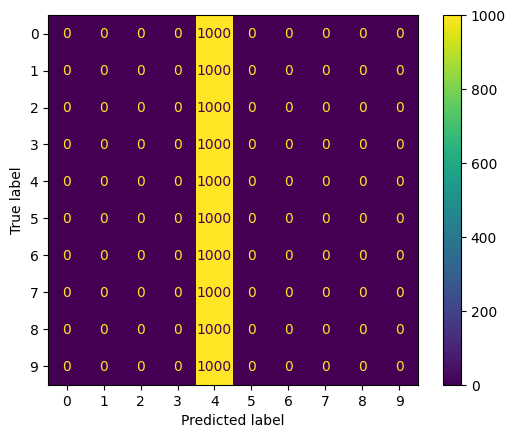

In [55]:
model_6_1 = model_6.from_config(config)
model_6_1.load_weights('fashion_weights_6.h5')


model_6_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model_6_1.fit(train_images, train_labels, batch_size = 10, epochs=10, verbose=0)
test_loss, test_acc = model_6_1.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)
  # Получим предсказания
probability_model = tf.keras.Sequential([model_6_1,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
y_pred = np.argmax(predictions, axis=1)
# Посмотрим на результаты
ConfusionMatrixDisplay.from_predictions(test_labels, y_pred)

In [56]:
recall_precision(test_labels, y_pred)

Класс - 0, точность - 0.000, полнота - 0.000
Класс - 1, точность - 0.000, полнота - 0.000
Класс - 2, точность - 0.000, полнота - 0.000
Класс - 3, точность - 0.000, полнота - 0.000
Класс - 4, точность - 0.100, полнота - 1.000
Класс - 5, точность - 0.000, полнота - 0.000
Класс - 6, точность - 0.000, полнота - 0.000
Класс - 7, точность - 0.000, полнота - 0.000
Класс - 8, точность - 0.000, полнота - 0.000
Класс - 9, точность - 0.000, полнота - 0.000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Итог по архетектурам

По итогу лучшей архитектурой явдяется - Сврточня нейроная сеть т.к она не так чувствительна к повороту изображения так же не плохой результат показала сеть прямого распстранения установленая с 4 мя скытыми слоями.  
Увеличение числа нейронов на первом скрытом слое по сравнению с входным слоем ломает сеть.  
Замена ф-и активации в целом сильно результат не меняет так как сеть не большая 4-5 слоя то sigmoid не страдает от затухания градиента а relu подобные не успевают выкл много нейронов

## Работа с гиперпараметрами обучения

## Гиперпараметры у сети прямого распостранения

In [8]:
model_7 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28), name='input'),
    keras.layers.Dense(256, activation='relu', name='hiden_one'),
    keras.layers.Dense(128, activation='relu', name='hiden_two'),
    keras.layers.Dense(64, activation='tanh', name='hiden_three'),
    keras.layers.Dense(64, activation='relu', name='hiden_four'),
    keras.layers.Dense(10, name='output')
])
config = model_7.get_config()
model_7.save_weights('fashion_weights_7.h5')

313/313 - 1s - loss: 0.3445 - accuracy: 0.8735 - 776ms/epoch - 2ms/step

Test accuracy при batch_size = 10, epochs = 5: 0.8734999895095825
313/313 [==============================] - 1s 2ms/step
Класс - 0, точность - 0.817, полнота - 0.824
Класс - 1, точность - 0.984, полнота - 0.969
Класс - 2, точность - 0.744, полнота - 0.834
Класс - 3, точность - 0.810, полнота - 0.936
Класс - 4, точность - 0.828, полнота - 0.711
Класс - 5, точность - 0.955, полнота - 0.962
Класс - 6, точность - 0.734, полнота - 0.622
Класс - 7, точность - 0.936, полнота - 0.943
Класс - 8, точность - 0.962, полнота - 0.983
Класс - 9, точность - 0.964, полнота - 0.951
313/313 - 1s - loss: 0.4197 - accuracy: 0.8611 - 609ms/epoch - 2ms/step

Test accuracy при batch_size = 10, epochs = 10: 0.8611000180244446
313/313 [==============================] - 1s 2ms/step
Класс - 0, точность - 0.801, полнота - 0.854
Класс - 1, точность - 0.994, полнота - 0.960
Класс - 2, точность - 0.803, полнота - 0.724
Класс - 3, точность - 0.90

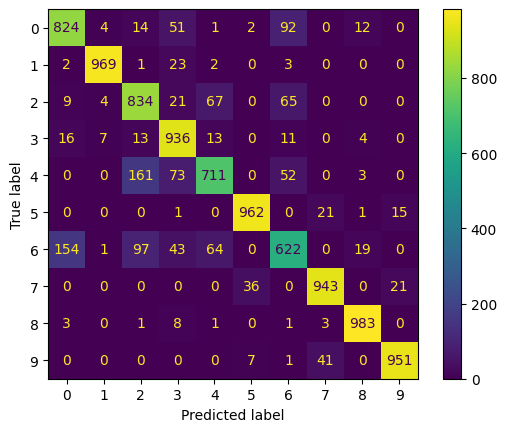

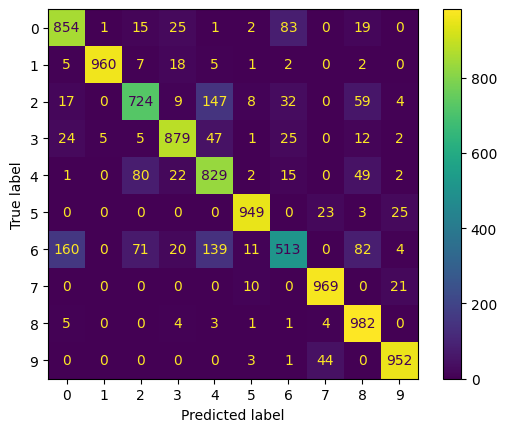

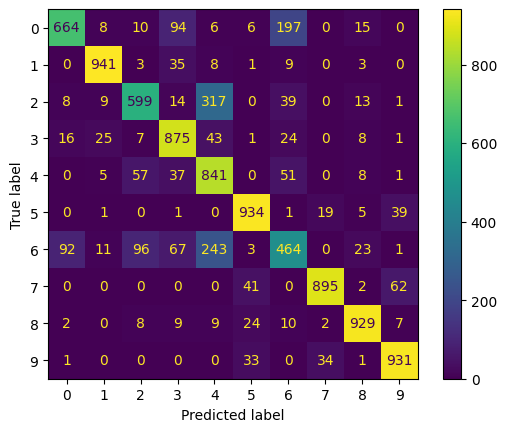

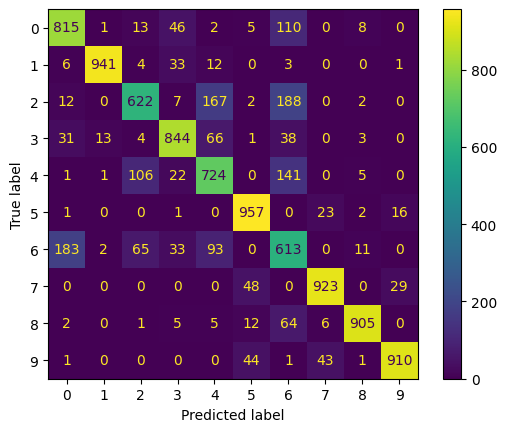

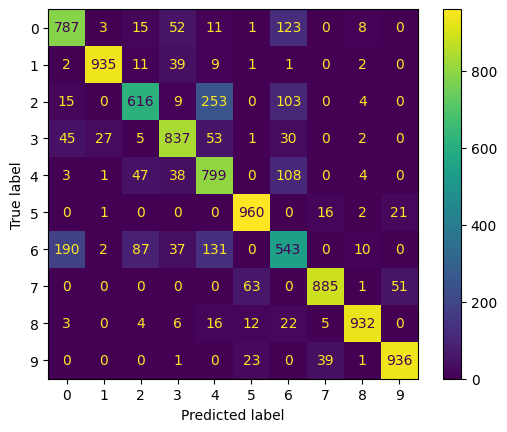

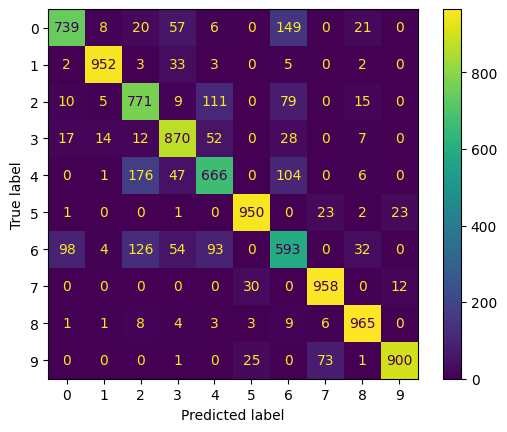

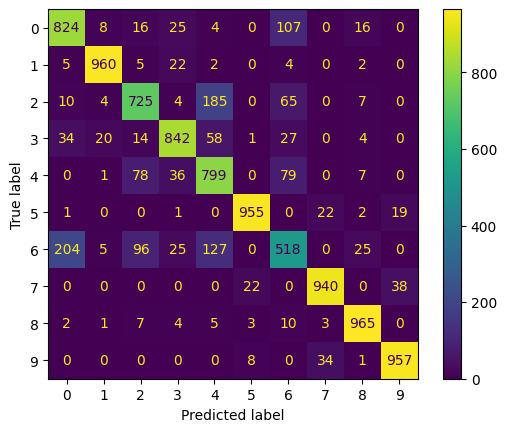

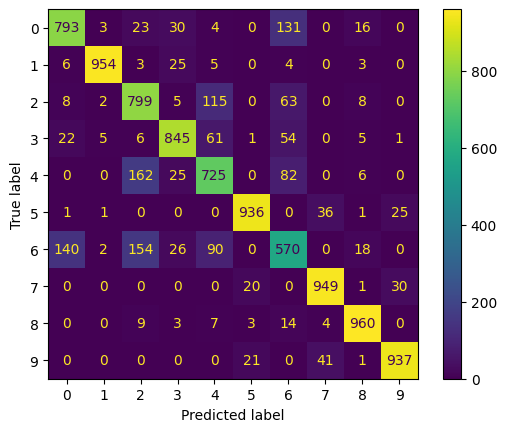

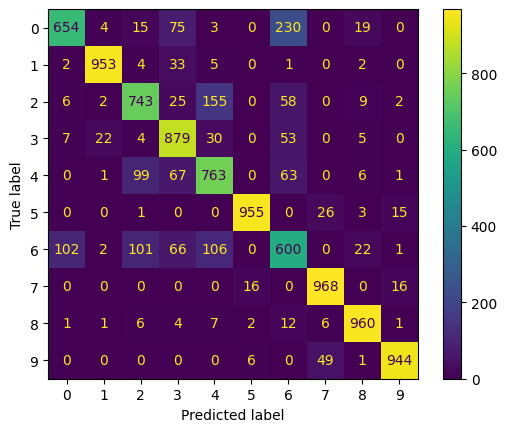

In [9]:
%%time
model_7 = model_7.from_config(config)
model_7.load_weights('fashion_weights_7.h5')


model_7.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
los_dict = {}
batch_size = [10, 50, 100]
epochs= [5, 10, 50]
for batch in batch_size:
  for eph in epochs:
    model_7.fit(train_images, train_labels, batch_size = batch, epochs=eph, verbose=0)
    test_loss, test_acc = model_7.evaluate(test_images,  test_labels, verbose=2)
    print(f'\nTest accuracy при batch_size = {batch}, epochs = {eph}:', test_acc)
    probability_model = tf.keras.Sequential([model_7,
                                         tf.keras.layers.Softmax()])
    predictions = probability_model.predict(test_images)
    y_pred = np.argmax(predictions, axis=1)
    ConfusionMatrixDisplay.from_predictions(test_labels, y_pred)
    recall_precision(test_labels, y_pred)
    los_dict[(batch,eph)] = test_acc

In [10]:
los_dict

{(10, 5): 0.8734999895095825,
 (10, 10): 0.8611000180244446,
 (10, 50): 0.8072999715805054,
 (50, 5): 0.8253999948501587,
 (50, 10): 0.8230000138282776,
 (50, 50): 0.8363999724388123,
 (100, 5): 0.8485000133514404,
 (100, 10): 0.8468000292778015,
 (100, 50): 0.8418999910354614}

## Гиперпараметры обучения у сверточной сети

313/313 - 1s - loss: 0.2544 - accuracy: 0.9128 - 805ms/epoch - 3ms/step

Test accuracy при batch_size = 10, epochs = 5: 0.9128000140190125
313/313 [==============================] - 1s 2ms/step
Класс - 0, точность - 0.864, полнота - 0.865
Класс - 1, точность - 0.994, полнота - 0.984
Класс - 2, точность - 0.828, полнота - 0.894
Класс - 3, точность - 0.914, полнота - 0.921
Класс - 4, точность - 0.875, полнота - 0.816
Класс - 5, точность - 0.983, полнота - 0.987
Класс - 6, точность - 0.763, полнота - 0.741
Класс - 7, точность - 0.965, полнота - 0.961
Класс - 8, точность - 0.975, полнота - 0.994
Класс - 9, точность - 0.968, полнота - 0.965
313/313 - 2s - loss: 0.4492 - accuracy: 0.9084 - 2s/epoch - 5ms/step

Test accuracy при batch_size = 10, epochs = 10: 0.9083999991416931
313/313 [==============================] - 2s 5ms/step
Класс - 0, точность - 0.863, полнота - 0.840
Класс - 1, точность - 0.987, полнота - 0.990
Класс - 2, точность - 0.836, полнота - 0.864
Класс - 3, точность - 0.924, 

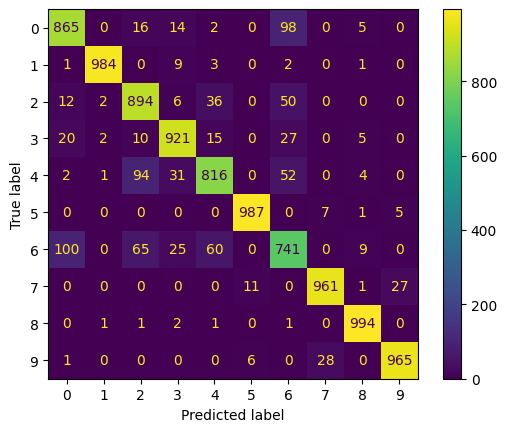

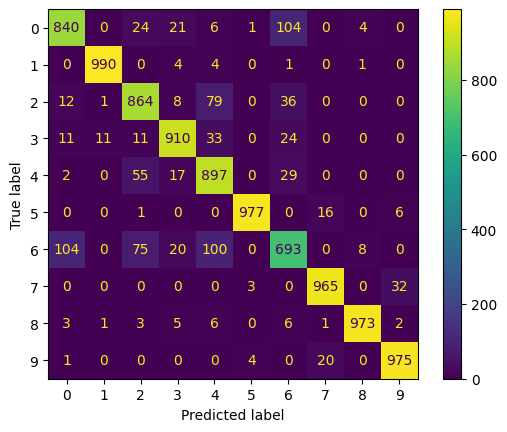

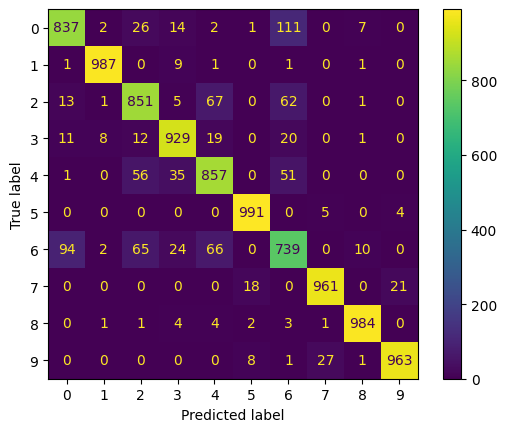

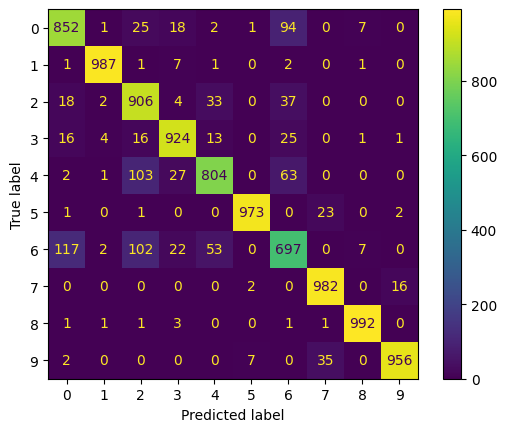

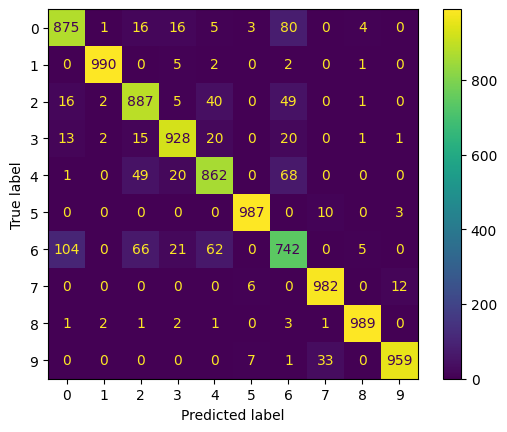

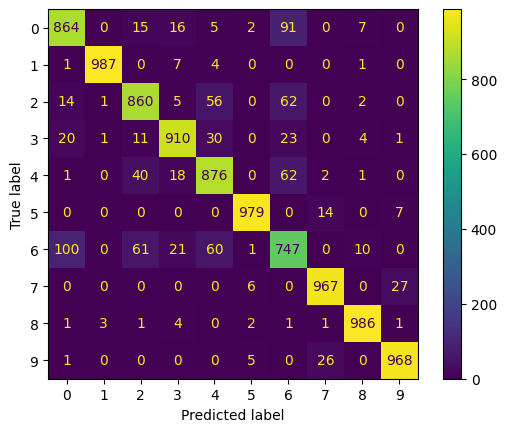

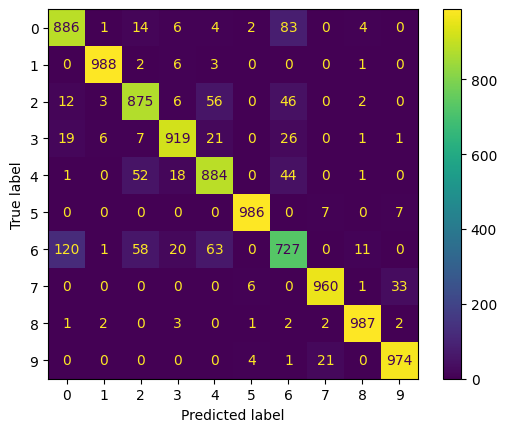

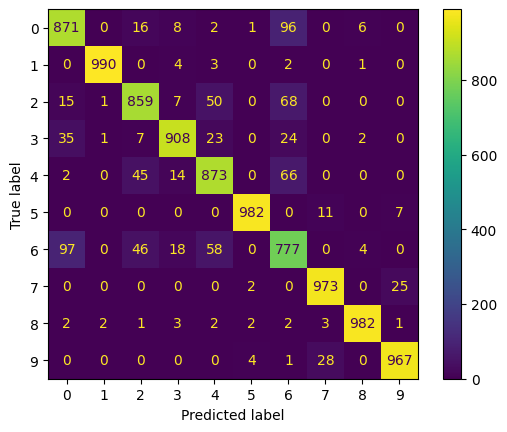

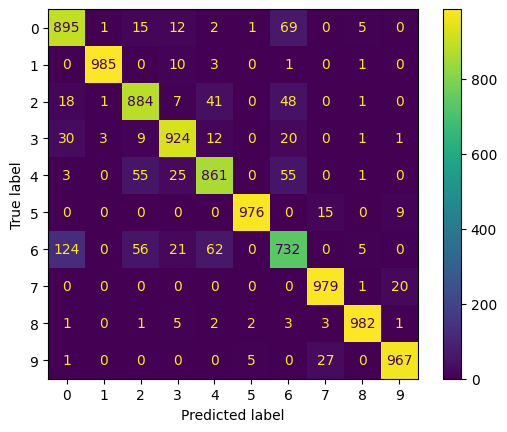

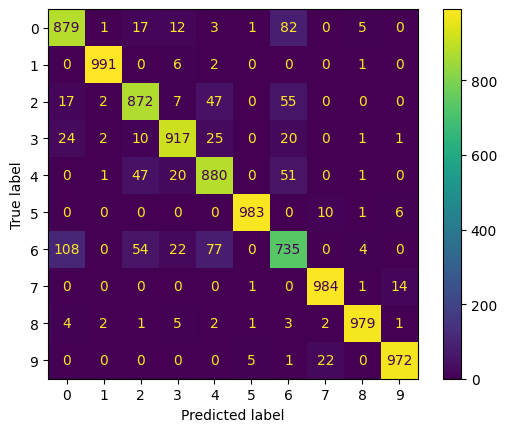

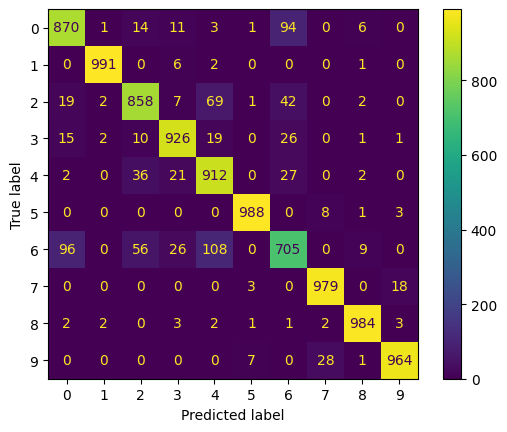

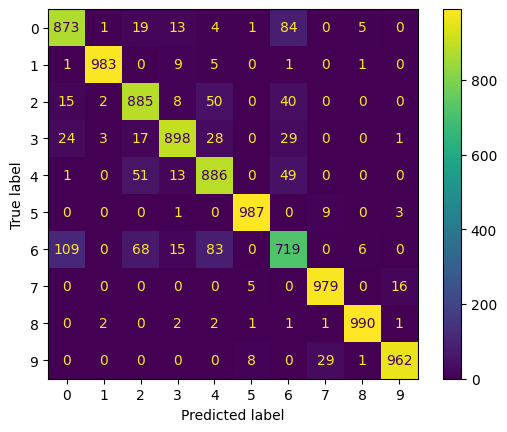

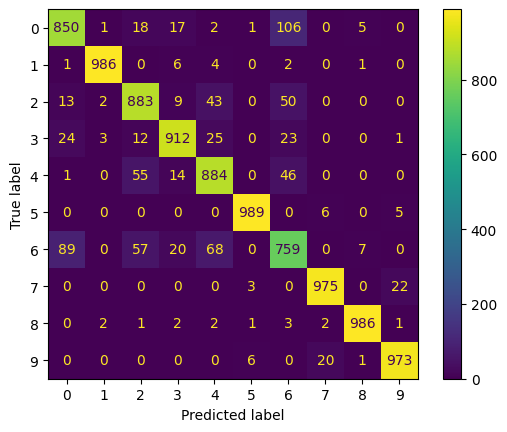

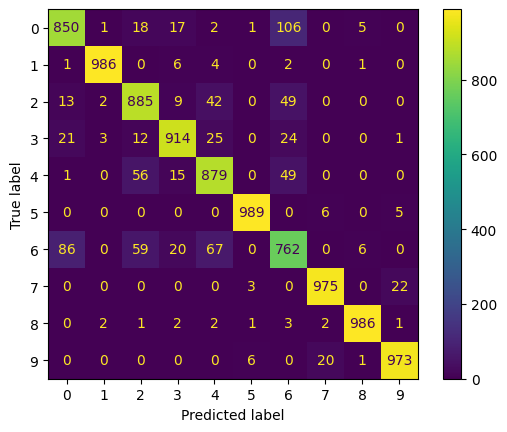

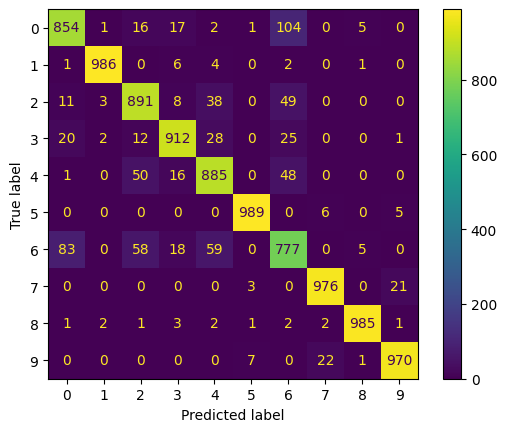

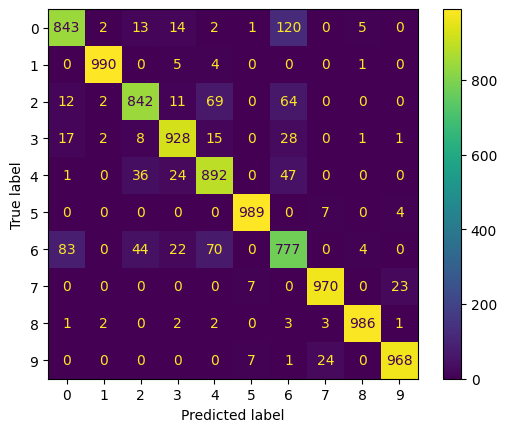

In [20]:
%%time
model_6 = model_6.from_config(config)
model_6.load_weights('fashion_weights_6.h5')


model_6.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
los_dict = {}
batch_size = [10, 50, 100, 150]
epochs= [5, 10, 50, 70]
for batch in batch_size:
  for eph in epochs:
    model_6.fit(train_images, train_labels, batch_size = batch, epochs=eph, verbose=0)
    test_loss, test_acc = model_6.evaluate(test_images,  test_labels, verbose=2)
    print(f'\nTest accuracy при batch_size = {batch}, epochs = {eph}:', test_acc)
    probability_model = tf.keras.Sequential([model_6,
                                         tf.keras.layers.Softmax()])
    predictions = probability_model.predict(test_images)
    y_pred = np.argmax(predictions, axis=1)
    ConfusionMatrixDisplay.from_predictions(test_labels, y_pred)
    recall_precision(test_labels, y_pred)
    los_dict[(batch,eph)] = test_acc

In [21]:
los_dict

{(10, 5): 0.9128000140190125,
 (10, 10): 0.9083999991416931,
 (10, 50): 0.9099000096321106,
 (10, 70): 0.9072999954223633,
 (50, 5): 0.9200999736785889,
 (50, 10): 0.9143999814987183,
 (50, 50): 0.9186000227928162,
 (50, 70): 0.9182000160217285,
 (100, 5): 0.9185000061988831,
 (100, 10): 0.9192000031471252,
 (100, 50): 0.9176999926567078,
 (100, 70): 0.9161999821662903,
 (150, 5): 0.919700026512146,
 (150, 10): 0.9199000000953674,
 (150, 50): 0.9225000143051147,
 (150, 70): 0.9185000061988831}

In [ ]:
model_8 = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2), strides=2),
    keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D((2, 2), strides=2),
    keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D((2, 2), strides=2),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10)
])
config = model_8.get_config()
model_8.save_weights('fashion_weights_6.h5')

In [ ]:
model_6 = model_6.from_config(config)
model_6.load_weights('fashion_weights_6.h5')


model_6.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model_6.fit(train_images, train_labels, batch_size = 10, epochs=10, verbose=0)
  # model.6fit(train_images, train_labels, batch_size = 250, epochs=el, verbose=0, validation_data=(test_images, test_labels))
  # model.fit(train_images, train_labels, batch_size = 10, epochs=10, verbose=0, validation_data=(test_images, test_labels), callbacks=[reduce_lr])
test_loss, test_acc = model_6.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)
  # Получим предсказания
probability_model = tf.keras.Sequential([model_6,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
y_pred = np.argmax(predictions, axis=1)
# Посмотрим на результаты
ConfusionMatrixDisplay.from_predictions(test_labels, y_pred)

## Ансамблирование моделей

313/313 [==============================] - 1s 2ms/step
0.9183
Класс - 0, точность - 0.878, полнота - 0.870
Класс - 1, точность - 0.990, полнота - 0.988
Класс - 2, точность - 0.880, полнота - 0.847
Класс - 3, точность - 0.914, полнота - 0.935
Класс - 4, точность - 0.838, полнота - 0.898
Класс - 5, точность - 0.985, полнота - 0.976
Класс - 6, точность - 0.784, полнота - 0.744
Класс - 7, точность - 0.959, полнота - 0.970
Класс - 8, точность - 0.984, полнота - 0.986
Класс - 9, точность - 0.968, полнота - 0.969
None


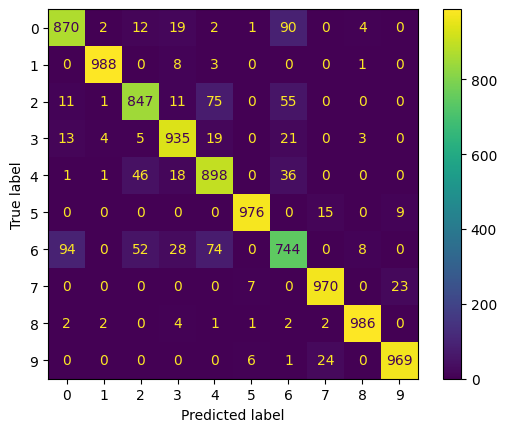

In [31]:
result = list()

probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])
probability_model_6 = tf.keras.Sequential([model_6,
                                         tf.keras.layers.Softmax()])
probability_model_4 = tf.keras.Sequential([model_4,
                                         tf.keras.layers.Softmax()])
result.append(probability_model.predict(test_images))
result.append(probability_model_6.predict(test_images))
result.append(probability_model_4.predict(test_images))
# Получаем финишное предсказание суммируя два массива с вероятностями
y_pred = np.argmax(sum(result), axis=1)
# Окончательная метрика качества
print(accuracy_score(test_labels, y_pred))
# Распределение предсказаний по классам
print(recall_precision(test_labels, y_pred))
ConfusionMatrixDisplay.from_predictions(test_labels, y_pred)

# Итог
Лучше всех с задачей справилась сверточная нейроная сеть.   
Создание ансабля из сверточной нейроной сети и 2 сетей с прямым распостранением не привело к улучшению метрики

In [19]:
def model_builder(hp):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28, 28)))

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_units = hp.Int('units', min_value=10, max_value=256, step=25)
  model.add(keras.layers.Dense(units=hp_units, activation='relu'))
  model.add(keras.layers.Dense(10))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model

tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3)

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)


In [20]:
tuner.search(train_images, train_labels, epochs=25, validation_split=0.2, callbacks=[stop_early])
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]
print(f' layer is {best_hps.get("units")}')




Trial 9 Complete [00h 00m 22s]
val_accuracy: 0.8725000023841858

Best val_accuracy So Far: 0.8725000023841858
Total elapsed time: 00h 02m 48s
 layer is 235
